In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier



In [7]:
df = pd.read_csv("Failures_Boosted.csv")

In [8]:
df.head()

,Unnamed: 0,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temp_Delta,Power,Time/Part,Planned_Stop,Failures
0,0,0.0,298.3,309.1,1616.0,31.1,195.0,10.8,5262.963565,2.0,0.0,0
1,1,0.0,298.2,307.8,1528.0,31.1,194.0,9.6,4976.366539,2.0,0.0,0
2,2,1.0,300.9,310.8,1599.0,33.0,7.0,9.9,5525.747318,3.0,0.0,0
3,3,0.0,301.4,310.5,1571.0,33.9,208.0,9.1,5577.049526,2.0,0.0,0
4,4,1.0,297.3,308.8,1469.0,44.1,150.0,11.5,6784.049424,3.0,0.0,0


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
for i in (('L', 0), ('M', 1), ('H', 2)):
    df['Type'] = df['Type'].replace(*i)

In [11]:
df.count()

Type                       14269
Air temperature [K]        14269
Process temperature [K]    14269
Rotational speed [rpm]     14269
Torque [Nm]                14269
Tool wear [min]            14269
Temp_Delta                 14269
Power                      14269
Time/Part                  14269
Planned_Stop               14269
Failures                   14269
dtype: int64

In [12]:
df = df.rename(columns={'Air temperature [K]':'Air_temperature','Process temperature [K]':'Process_temperature',
                        'Rotational speed [rpm]': 'Rotational_speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool_wear','Time/Part':'Part_Time'})

In [13]:
df

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Temp_Delta,Power,Part_Time,Planned_Stop,Failures
0,0.000000,298.300000,309.100000,1616.000000,31.100000,195.000000,10.800000,5262.963565,2.000000,0.0,0
1,0.000000,298.200000,307.800000,1528.000000,31.100000,194.000000,9.600000,4976.366539,2.000000,0.0,0
2,1.000000,300.900000,310.800000,1599.000000,33.000000,7.000000,9.900000,5525.747318,3.000000,0.0,0
3,0.000000,301.400000,310.500000,1571.000000,33.900000,208.000000,9.100000,5577.049526,2.000000,0.0,0
4,1.000000,297.300000,308.800000,1469.000000,44.100000,150.000000,11.500000,6784.049424,3.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
14264,0.272735,302.781812,311.036359,1366.363410,48.472735,83.818739,8.254547,6935.151460,2.272735,0.0,1
14265,0.000000,299.004178,309.715506,1364.646240,52.995822,215.210771,10.711328,7571.722515,2.000000,0.0,1
14266,0.000000,299.775041,308.987531,1432.498521,63.487564,141.500821,9.212490,9518.011853,2.000000,0.0,1
14267,0.000000,301.233468,310.306376,1318.908389,64.920716,193.083669,9.072908,8964.822990,2.000000,0.0,1


In [14]:
num_data = ['Air_temperature','Process_temperature','Rotational_speed','Torque','Tool_wear','Temp_Delta', 'Power']
categorical = ['Type', 'Part_Time']

target1 = ['Failures']
target2 = ['TWF']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_data] = scaler.fit_transform(df[num_data])

In [16]:
X = df.drop(columns=['Failures'])
y= df['Failures']

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Failures, dtype: int64

In [18]:
X

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Temp_Delta,Power,Part_Time,Planned_Stop
0,0.000000,-1.141586,-0.830186,0.278024,-0.955825,1.130844,1.061034,-0.947754,2.000000,0.0
1,0.000000,-1.192609,-1.819654,0.006219,-0.955825,1.115885,-0.049339,-1.123579,2.000000,0.0
2,1.000000,0.185004,0.463734,0.225516,-0.827838,-1.681538,0.228254,-0.786538,3.000000,0.0
3,0.000000,0.440118,0.235395,0.139033,-0.767212,1.325318,-0.511994,-0.755064,2.000000,0.0
4,1.000000,-1.651813,-1.058525,-0.176013,-0.080122,0.457668,1.708752,-0.014578,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
14264,0.272735,1.145156,0.643633,-0.493026,0.214433,-0.532369,-1.294301,0.078122,2.272735,0.0
14265,0.000000,-0.782295,-0.361706,-0.498330,0.519116,1.433187,0.978985,0.468653,2.000000,0.0
14266,0.000000,-0.388980,-0.915789,-0.288755,1.225859,0.330525,-0.407906,1.662688,2.000000,0.0
14267,0.000000,0.355149,0.088022,-0.639600,1.322398,1.102177,-0.537063,1.323311,2.000000,0.0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

class XGBoostTuner:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.model = XGBClassifier()
        self.params = {
            'n_estimators': [1000, 1500, 2000],
            'max_depth': [2, 3, 6],
            'subsample': [0.90, 0.95, 1],
            'learning_rate': [0.01,0.05,0.1],
            'objective': ['binary:logistic', 'binary:hinge'],
            'min_child_weight': [5, 10, 15], 
            'reg_alpha':[0.1], 
            'reg_lambda':[0.1]
        }

    def tune_hyperparameters(self):     
        search = GridSearchCV(self.model, self.params, cv=5, scoring='roc_auc')
        search.fit(self.X_train, self.y_train)
        return search


xgboost_tuner = XGBoostTuner(X_train, y_train)
search_results = xgboost_tuner.tune_hyperparameters()

best_model = search_results.best_estimator_
score = search_results.best_score_

print("Model Training:")
print(best_model)

print("Results:")
print(score)



Model Training:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Results:
0.9999354823900408


In [23]:
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

class XGBoostTuner:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.model = XGBClassifier()
        self.params = {
            'n_estimators': [2000],
            'max_depth': [3],
            'subsample': [0.8],
            'learning_rate': [0.05],
            'objective': ['binary:logistic', 'binary:hinge'],
            'min_child_weight': [5], 
            'reg_alpha':[0.1], 
            'reg_lambda':[0.1]
        }

    def tune_hyperparameters(self):     
        search = GridSearchCV(self.model, self.params, cv=5, scoring='roc_auc')
        search.fit(self.X_train, self.y_train)
        return search


xgboost_tuner = XGBoostTuner(X_train, y_train)
search_results = xgboost_tuner.tune_hyperparameters()

best_model = search_results.best_estimator_
score = search_results.best_score_

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model Training:")
print(best_model)

print("Results:")
print(score)

Model Training:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Results:
0.999900458403759


Classification Report (Test Data):
              precision    recall  f1-score   support

           0     0.9978    0.9935    0.9957      1386
           1     0.9939    0.9980    0.9959      1468

    accuracy                         0.9958      2854
   macro avg     0.9959    0.9957    0.9958      2854
weighted avg     0.9958    0.9958    0.9958      2854

Confusion Matrix (Test Data):


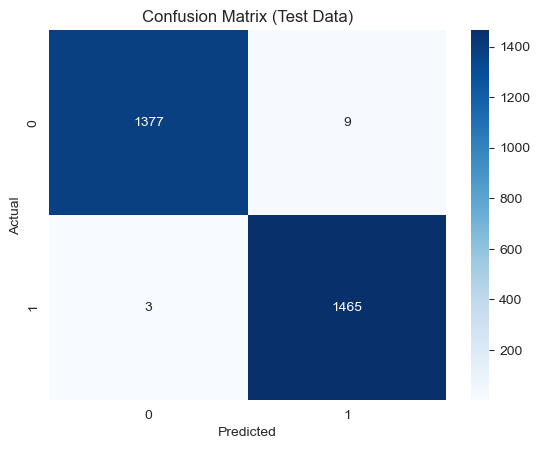

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class Xgboost_test:
    def __init__(self, X_test, y_test, best_model):
        self.X_test = X_test
        self.y_test = y_test
        self.best_model = best_model 

    def evaluate_model(self):
        y_pred = self.best_model.predict(self.X_test)
        return y_pred

xgboost_tester = Xgboost_test(X_test, y_test, best_model)
y_pred_test = xgboost_tester.evaluate_model()

print('Classification Report (Test Data):')
print(classification_report(y_test, y_pred_test, digits=4))

print('Confusion Matrix (Test Data):')
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual', fontsize=10)
plt.xlabel('Predicted', fontsize=10)
plt.title('Confusion Matrix (Test Data)', fontsize=12)
plt.show()

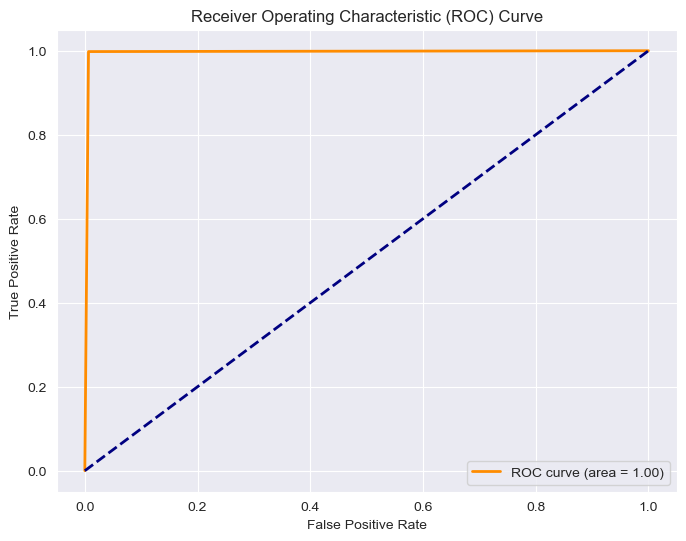

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
import pickle

with open('xgboost_tuner_model.pkl', 'wb') as file:
  pickle.dump(best_model, file)

#with open('xgboost_tuner_model.pkl', 'rb') as file:
#   loaded_model = pickle.load(file)